<a href="https://colab.research.google.com/github/SalinSharma666/Data-Science-Projects/blob/main/Water_Potability_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to perform a prediction on the potability(drinkability) of water from the below data set.

Let's download the data first.

Now we will read this file through pandas

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/water_potability.csv")

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Here we can see multiple features of the data like pH, hardness, sulfates and so on. Let's find out if the data contains missing values so that we can fill it.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.shape

(3276, 10)

As we clearly see, this dataframe has 3276 rows and 10 columns.

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


From the above table, we can see the central tendency and the measures of dispersion of the data.

In [ ]:
df.isna()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


We see that the data set does contain some missing values. Let's see how many exactly in total.

In [ ]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.isna().sum()/len(df) * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

From the above data we can clearly see that the features pH, Sulfate and Trihalomethanes contain 491,781 and 162 missing data. It comprises that 14.98%, 23.84% and 4.94% of data are missing in each of the 3 features respectively.

Visualizing the missing data for further clarity

In [ ]:
import seaborn as sns

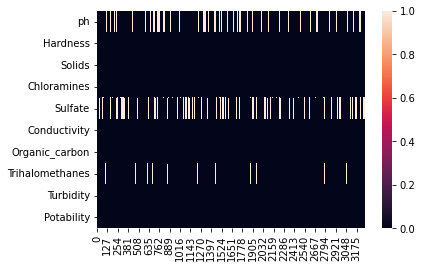

In [ ]:
sns.heatmap(df.isna().transpose())

In the above heatmap, the white patches are where the data is missing.

As now, we have confirmed that this data set contains missing data. We need to find out if the data contains outliers. If they data contains outliers then it would not be a sensible decision to fill the missing data with mean, we will have to fill it with the median values of the respective features.

We will use box plot to find if the data contains outliers on the features that contain the missing data i.e., ph, Sulfate and Trihalomethanes

As we can see that the ph feature contains outliers, we will use median to fill the missing data

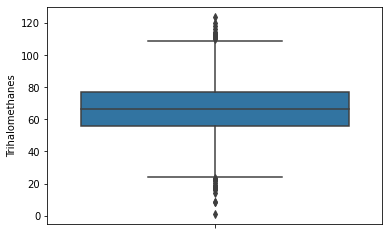

In [ ]:
sns.boxplot(y = df.Trihalomethanes)

In [ ]:
df['Trihalomethanes']

0        86.990970
1        56.329076
2        66.420093
3       100.341674
4        31.997993
           ...    
3271     66.687695
3272           NaN
3273     69.845400
3274     77.488213
3275     78.698446
Name: Trihalomethanes, Length: 3276, dtype: float64

In [ ]:
df['Trihalomethanes'] = df.Trihalomethanes.fillna(df.Trihalomethanes.median())

In [ ]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes      0
Turbidity            0
Potability           0
dtype: int64

We have filled the missing data of Trihalomethanes with it's median value. In contrast, we are going to drop the ph and sulfate columns as  they contain high percentage of missing data. Filling them up would not give us the correct reults.

In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
df.drop(columns = ['ph','Sulfate'], inplace=True)

In [ ]:
df.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.Potability.unique()

array([0, 1])

In [ ]:
df.groupby('Potability').mean()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,
0,196.733292,21777.490788,7.092175,426.730454,14.364335,66.320635,3.965800
1,195.800744,22383.991018,7.169338,425.383800,14.160893,66.543247,3.968328


Here, we do not see much difference between each of the features relating to potability of water. Therefore, all of the features would be relevant data

In [ ]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


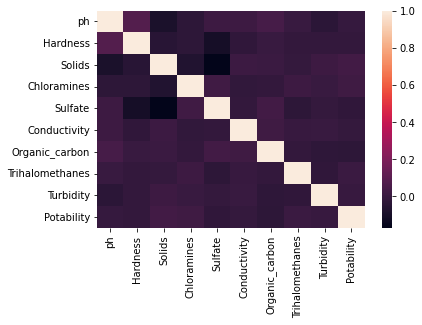

In [ ]:
sns.heatmap(df.corr())

We don't see any strong positive correlation of any of the features with the potability of water. Again, we must conclude to take all the features as relevant data

In [ ]:
df.columns

Index(['Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon',
       'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
df.dtypes

Hardness           float64
Solids             float64
Chloramines        float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

Now we will model the data and we will fit and evaluate the model. Since our target is a discrete data, we will use classification algorithms to make the predictions

In [ ]:
X = df.iloc[:,:-1]

In [ ]:
X.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135
1,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656
2,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934
3,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771
4,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075


In [ ]:
y = df.Potability
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

We will split the data into train data and test data, which will be later fitted into the model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=40)

In [ ]:
x_train.shape, y_train.shape

((2620, 7), (2620,))

In [ ]:
x_test.shape, y_test.shape

((656, 7), (656,))

In [ ]:
x_train.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1439,146.130599,13467.879780,6.423224,412.840506,14.307687,81.529534,4.016144
2660,238.992414,11635.772076,3.923239,406.245129,15.410764,66.622485,2.692389
340,159.188050,12837.506063,5.164448,558.815567,12.254081,69.772210,4.396605
970,197.570736,17439.444061,6.226491,406.014794,16.690266,68.969018,3.458320
2030,213.249258,18821.389612,6.475113,405.278738,16.872395,55.905770,3.551568


First of all, we be using Logistic Regression to create prediction models

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter = 1000)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
confusion_matrix(y_test, y_pred)

array([[394,   1],
       [261,   0]])

In [ ]:
accuracy_score(y_test, y_pred)

0.600609756097561

In [ ]:
precision_score(y_test, y_pred)

0.0

In [ ]:
recall_score(y_test, y_pred)

0.0

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       395
           1       0.00      0.00      0.00       261

    accuracy                           0.60       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.36      0.60      0.45       656



Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=  model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62       395
           1       0.43      0.44      0.44       261

    accuracy                           0.55       656
   macro avg       0.53      0.53      0.53       656
weighted avg       0.55      0.55      0.55       656



Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.87      0.73       395
           1       0.50      0.20      0.29       261

    accuracy                           0.60       656
   macro avg       0.56      0.54      0.51       656
weighted avg       0.58      0.60      0.55       656



**In conclusion**
We will be able to use this classification model to predict the potability(purity0 of water.